In [1]:
from Bio import SeqIO
from time import time
from pathlib import Path
#import gensim
import numpy as np
import os
#from sklearn.model_selection import StratifiedKFold
#from sklearn import metrics
#import pandas as pd

In [6]:
import joblib
posname = "usr60-5mc-pos.fasta"
negname = "usr60-5mc-neg.fasta"
#pospath = os.path.join(os.pardir,posname)
#negpath = os.path.join(os.pardir,negname)
pospath= posname
negpath= negname

In [2]:
import os
import joblib
x_test_path = Path("5cm-xtest-21Mar14.jbl")
x_test_path.touch(exist_ok=True)
with open(x_test_path, "rb") as file_handle:
    X_test = joblib.load(file_handle)


d_path = os.getcwd()
fname_pd = "5cm-ypred-dict21Mar14.jbl"
with open(os.path.join(d_path,fname_pd),"rb") as fp:
        y_pred_dict = joblib.load(fp)
y_test = y_pred_dict["Ground_truth"]

print(X_test.shape, y_test.shape)

(28786, 41) (28786,)


In [3]:
import joblib
model_store_name = "5cm-model-dict21Mar14.jbl"
with open (model_store_name, "rb") as fp_handle:
    model_dict = joblib.load(fp_handle)

for k,v in model_dict.items():
    print("{}{}{}".format("*"*30,k,"*"*30))
    print(v.summary())

Using TensorFlow backend.
W0315 20:53:38.461425 23300 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 20:53:38.497425 23300 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0315 20:53:38.580424 23300 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0315 20:53:38.585427 23300 deprecation_wrapper.py:119] From C:\Miniconda3\envs\py36tfkeras\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0315 20:53:38.586428 23300 

In [5]:
model_dict["CNN"].save("cnnmethLysine.h5")

## Prepare Feature Extractors

In [4]:
from keras import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

In [24]:
print(X_test.shape)
x_valid = X_test[1000:2000]
y_valid = y_test[1000:2000]
#x_valid = X_test
#y_valid = y_test

(28786, 41)


In [25]:
feat_layer = "dense_9"
model_name= "BiDirection_LSTM"
print(x_valid.shape)
extractor = Model(inputs=model_dict[model_name].input, outputs = 
                       model_dict[model_name].get_layer(feat_layer).output)
tmp = extractor.predict(x_valid)
#tmp = extractor.predict(X_test[0:1000])
print(x_valid.shape)
print("Tsne Started: \n")
mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(x_valid)
print(mtsne.shape)

(1000, 41)
(1000, 41)
Tsne Started: 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.212126
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.206245
[t-SNE] KL divergence after 1000 iterations: 2.478731
(1000, 2)


In [26]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
# extract x and y coordinates representing the positions of the images on T-SNE plot
#tsne_bdgru = tsne_bdgru[:,]
tx = mtsne[:, 0]
ty = mtsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(1000,) (1000,)


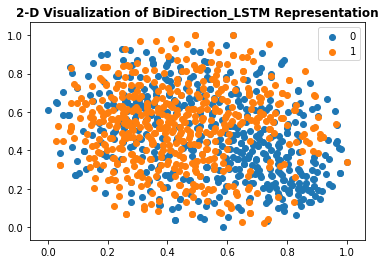

In [27]:
mlist = [0,1]
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
# for every class, we'll add a scatter plot separately
#for label in colors_per_class:
for label in mlist:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(y_valid) if l == label]

    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # convert the class color to matplotlib format
    #color = np.array(mlist[label], dtype=np.float) / 255

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')
plt.title('2-D Visualization of BiDirection_LSTM Representation',\
          fontsize=12, fontweight='bold')
# finally, show the plot
plt.show()
#fig.savefig("5mc_BDLSTM_Rep.png",dpi=600)
plt.close()

In [11]:
#feat_layer = "simple_rnn_1"
feat_layer = "dense_7"
model_name= "BiDirection_GRU"
print(x_valid.shape)
extractor = Model(inputs=model_dict[model_name].input, outputs = 
                       model_dict[model_name].get_layer(feat_layer).output)
tmp = extractor.predict(x_valid)
#tmp = extractor.predict(X_test[0:1000])
print(tmp.shape)
print("Tsne Started: \n")
mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(x_valid)
print(mtsne.shape)
print("Scaling Feats")
tx = mtsne[:, 0]
ty = mtsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(1000, 41)
(1000, 10)
Tsne Started: 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.085s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.204976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.717751
[t-SNE] KL divergence after 1000 iterations: 2.481551
(1000, 2)
Scaling Feats
(1000,) (1000,)


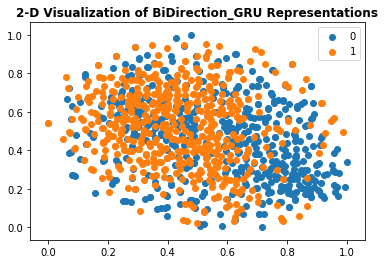

In [12]:
mlist = [0,1]
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
for label in mlist:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(y_valid) if l == label]
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # convert the class color to matplotlib format
    #color = np.array(mlist[label], dtype=np.float) / 255
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)
# build a legend using the labels we set previously
ax.legend(loc='best')
plt.title('2-D Visualization of BiDirection_GRU Representations',\
          fontsize=12, fontweight='bold')
# finally, show the plot
plt.show()
fig.savefig("5mc_BDGRU_Rep.png",dpi=600)
plt.close()

In [13]:
from keras.models import load_model
#cnn_model = load_model('diMethylK_CNN21Mar05.h5')
#feat_layer = "global_average_pooling1d_1"
feat_layer = "dense_11"
model_name= "CNN"
print(x_valid.shape)
extractor = Model(inputs=model_dict[model_name].input, outputs = 
                       model_dict[model_name].get_layer(feat_layer).output)

print(x_valid.shape)
extractor = Model(inputs=model_dict[model_name].input, outputs = 
                       model_dict[model_name].get_layer(feat_layer).output)
#extractor = Model(inputs=cnn_model.input, outputs = 
#                       cnn_model.get_layer(feat_layer).output)
tmp = extractor.predict(x_valid)
#tmp = extractor.predict(X_test[0:1000])
print(tmp.shape)
print("Tsne Started: \n")
mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(tmp)
print(mtsne.shape)
print("Scaling Feats")
tx = mtsne[:, 0]
ty = mtsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(1000, 41)
(1000, 41)
(1000, 8)
Tsne Started: 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.166895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.378853
[t-SNE] KL divergence after 1000 iterations: 0.311182
(1000, 2)
Scaling Feats
(1000,) (1000,)


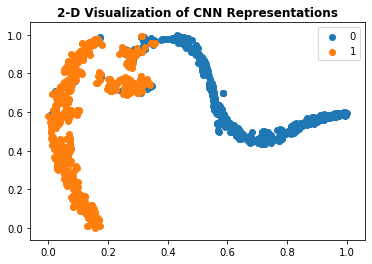

In [15]:
mlist = [0,1]
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
for label in mlist:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(y_valid) if l == label]
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # convert the class color to matplotlib format
    #color = np.array(mlist[label], dtype=np.float) / 255
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)
# build a legend using the labels we set previously
ax.legend(loc='best')
plt.title('2-D Visualization of CNN Representations',\
          fontsize=12, fontweight='bold')
# finally, show the plot
plt.show()
fig.savefig("CNN_Rep.png",dpi=600)
plt.close()

In [16]:
#feat_layer = "cu_dnngru_1"
feat_layer = "dense_5"
model_name= "GRU"
print(x_valid.shape)
extractor = Model(inputs=model_dict[model_name].input, outputs = 
                       model_dict[model_name].get_layer(feat_layer).output)
#tmp = extractor.predict(X[0:1000])
tmp = extractor.predict(x_valid)
print(tmp.shape)
print("Tsne Started: \n")
mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(tmp)
print(mtsne.shape)
print("Scaling Feats")
tx = mtsne[:, 0]
ty = mtsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(1000, 41)
(1000, 10)
Tsne Started: 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.218667
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.893723
[t-SNE] KL divergence after 1000 iterations: 0.411111
(1000, 2)
Scaling Feats
(1000,) (1000,)


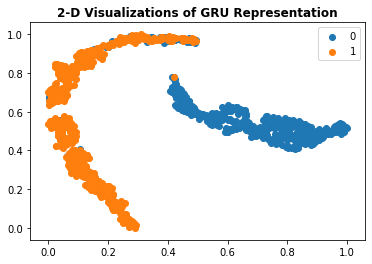

In [17]:
mlist = [0,1]
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
for label in mlist:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(y_valid) if l == label]
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # convert the class color to matplotlib format
    #color = np.array(mlist[label], dtype=np.float) / 255
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)
# build a legend using the labels we set previously
ax.legend(loc='best')
plt.title('2-D Visualizations of GRU Representation',\
          fontsize=12, fontweight='bold')
# finally, show the plot
plt.show()
fig.savefig("GRU_Rep.png",dpi=600)
plt.close()

In [18]:
#feat_layer = "cu_dnnlstm_1"
feat_layer = "dense_1"
model_name= "LSTM"
print(x_valid.shape)
extractor = Model(inputs=model_dict[model_name].input, outputs = 
                       model_dict[model_name].get_layer(feat_layer).output)
#tmp = extractor.predict(X[0:1000])
tmp = extractor.predict(x_valid)
print(tmp.shape)
print("Tsne Started: \n")
mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(tmp)
print(mtsne.shape)
print("Scaling Feats")
tx = mtsne[:, 0]
ty = mtsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(1000, 41)
(1000, 10)
Tsne Started: 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.021469
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.977806
[t-SNE] KL divergence after 1000 iterations: 0.290575
(1000, 2)
Scaling Feats
(1000,) (1000,)


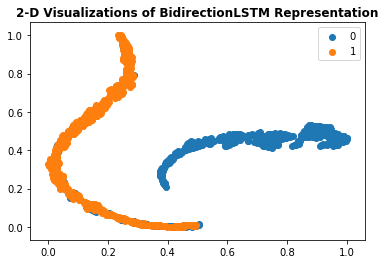

In [20]:
mlist = [0,1]
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
for label in mlist:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(y_valid) if l == label]
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # convert the class color to matplotlib format
    #color = np.array(mlist[label], dtype=np.float) / 255
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)
# build a legend using the labels we set previously
ax.legend(loc='best')
plt.title('2-D Visualizations of BidirectionLSTM Representation',\
          fontsize=12, fontweight='bold')
# finally, show the plot
plt.show()
fig.savefig("BDLSTM_Rep.png",dpi=600)
plt.close()

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(x_valid)
#mtsne = TSNE(n_components=2, init='pca', verbose=1).fit_transform(X_test[1000:2000])
print(mtsne.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.204976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.213638
[t-SNE] KL divergence after 1000 iterations: 2.498264
(1000, 2)


In [22]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
# extract x and y coordinates representing the positions of the images on T-SNE plot
#tsne_bdgru = tsne_bdgru[:,]
tx = mtsne[:, 0]
ty = mtsne[:, 1]
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)
print(tx.shape, ty.shape)

(1000,) (1000,)


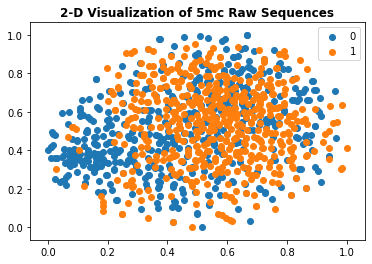

In [23]:
mlist = [0,1]
# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
for label in mlist:
    # find the samples of the current class in the data
    #indices = [i for i, l in enumerate(y_test) if l == label]
    indices = [i for i, l in enumerate(y_valid) if l == label]
    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    # convert the class color to matplotlib format
    #color = np.array(mlist[label], dtype=np.float) / 255
    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, label=label)
# build a legend using the labels we set previously
ax.legend(loc='best')
plt.title('2-D Visualization of 5mc Raw Sequences',\
          fontsize=12, fontweight='bold')
# finally, show the plot
plt.show()
fig.savefig("raw_Rep.png",dpi=600)
plt.close()